In [16]:
import numpy as np
import matplotlib.pyplot as plt 
from math import pi 
from scipy.spatial.distance import cdist
import scipy.stats as sts
%matplotlib notebook

Plotting a 2d Gaussian contour plot 


Here we will define the functions necessary for this task , i.e. a general (ish) gaussian process function, and kernel functions, the first set of kernels will be squared exponential functions. We then define our range of values as well as our mean of our function, here wlog we set the mean to be zeros. 

In [17]:
x_prior = np.linspace(0,10,101,endpoint=False)
x_prior = x_prior.reshape(-1,1)
mu = np.zeros(x_prior.shape)

In [18]:
def sec(a,b, length_scale , sigma) : 
    K = sigma * np.exp(-1/(2*length_scale) * cdist(a,b)**2)
    return K 

In [19]:
def GP_prior(a , b, mu , kernel , length_scale, sigma , samples ) :
    f = np.random.multivariate_normal(mu.flat, kernel(a ,b , length_scale , sigma ) , samples)
    return f

In [20]:
prior = GP_prior(x_prior ,x_prior, mu , sec , 1, 1 , 5)

<IPython.core.display.Javascript object>


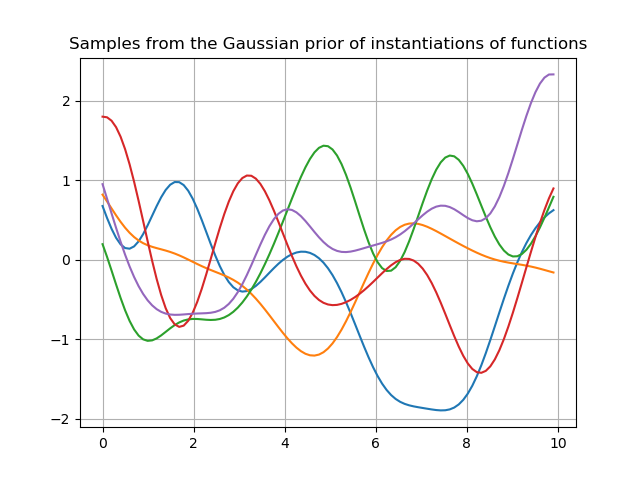

In [21]:
plt.figure()
plt.grid()
plt.title('Samples from the Gaussian prior of instantiations of functions')
plt.plot(x_prior , prior.T,)
plt.show()
plt.savefig('prior sampling GP prior')


I will now add some data from a sin function into the prior to obtain a posterior distribution

In [24]:
x_train = np.arange(1,10,2.3)
x_train = x_train.reshape(-1,1)

def straight_line(m , x , c):
    y = 5*x + c         
    return y 

#ytrain = straight_line(5 , x_train , 0)
ytrain = np.cos(x_train) 

sigma = 0.4

def Posterior(introduced_err,x_train,ytrain,x_prior,samples):

    K_train = sec(x_train , x_train , 1,1)
    K_prior = sec(x_prior , x_prior , 1,1)
    K_pt =  sec(x_prior , x_train , 1,1)
    K_tp = sec(x_train , x_prior ,  1,1)  ## = k_tp transpose

    mean_function = np.dot(np.dot(K_pt ,np.linalg.inv((K_train)+((introduced_err**2)*np.eye(len(x_train))))  ), ytrain) 
    covariance_function = K_prior - np.dot(np.dot(K_pt ,np.linalg.inv((K_train) + ((introduced_err**2)*np.eye(len(x_train))))) , K_tp) 

    post = np.random.multivariate_normal(mean_function[:,0],covariance_function , samples)

    std = np.diag(covariance_function)
    
    return mean_function,covariance_function,post,std

mean_function,covariance_function,post,std = Posterior(sigma,x_train,ytrain,x_prior,100)

<IPython.core.display.Javascript object>


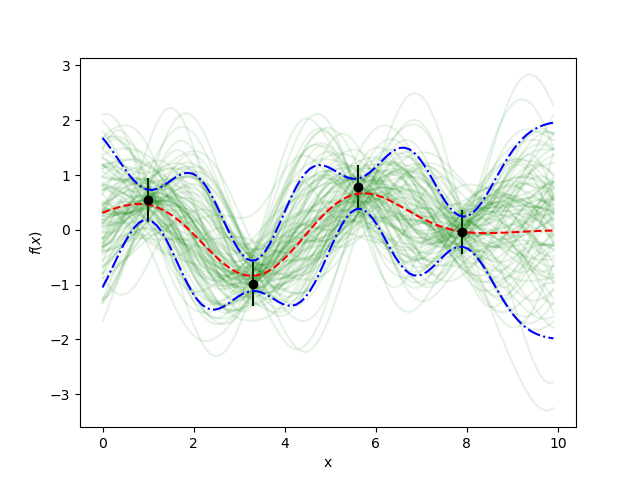

In [25]:
plt.figure()
for i in range(len(post)):
    plt.plot(x_prior,post[i,:],'g-',alpha=0.1)
    
plt.errorbar(x_train,ytrain, yerr=sigma,color='k',fmt='o')

plt.plot(x_prior , mean_function.flat, 'r--')
plt.plot(x_prior , mean_function.flat + (2*std), 'b-.')
plt.plot(x_prior , mean_function.flat - (2*std), 'b-.')

y1 = mean_function[:,0] - (2*std)
y2 = mean_function[:,0] - (2*std)

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.show()
plt.savefig('GP example  + noise')